In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

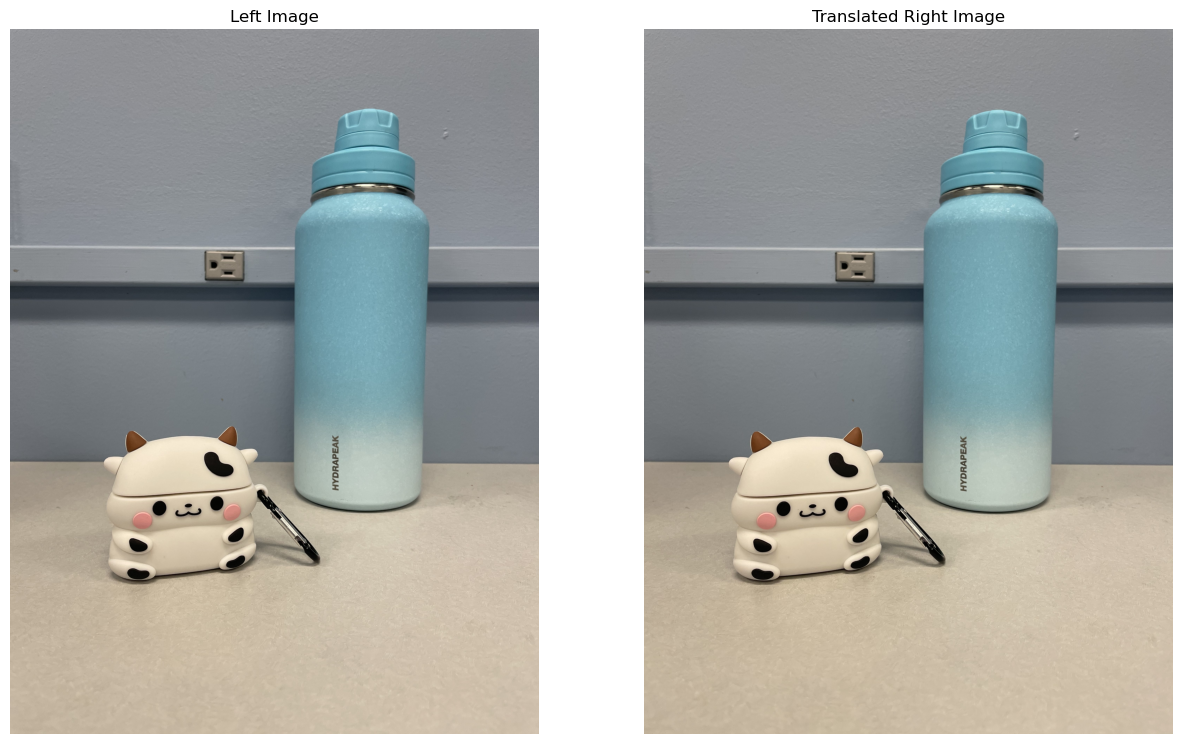

In [3]:
img1 = cv2.imread('HW_04_Images/Pair One/L1.jpg') # left image
img2 = cv2.imread('HW_04_Images/Pair One/R1.jpg') # right image

#Convert BGR to RGB
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Plot one of the images
def plot(images, titles):
    plt.figure(figsize=(15,12))
    for i in range(len(images)):
        plt.subplot(1, 2, i+1)
        plt.title(titles[i])
        plt.imshow(images[i])
        plt.axis('off')

plot([img1_rgb, img2_rgb], ["Left Image", "Translated Right Image"])

In [4]:
# Try a different method
orb = cv2.ORB_create(20000)

kp, des = orb.detectAndCompute(img1_rgb, None)

img1_kp = cv2.drawKeypoints(img1_rgb, kp, 0, (0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

img2_kp = cv2.drawKeypoints(img2_rgb, kp, 0, (0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

kp_images = [img1_kp, img2_kp]


#### View the keypoints in the image

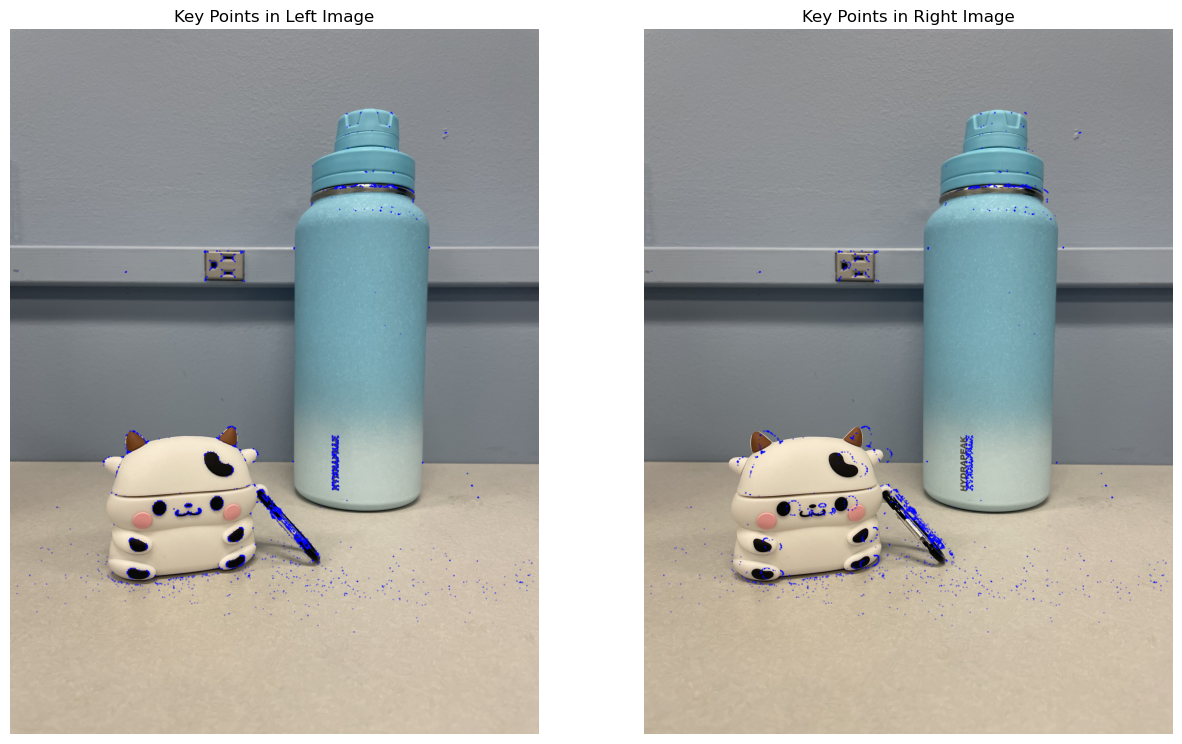

In [5]:
plot(kp_images, ["Key Points in Left Image", "Key Points in Right Image"])

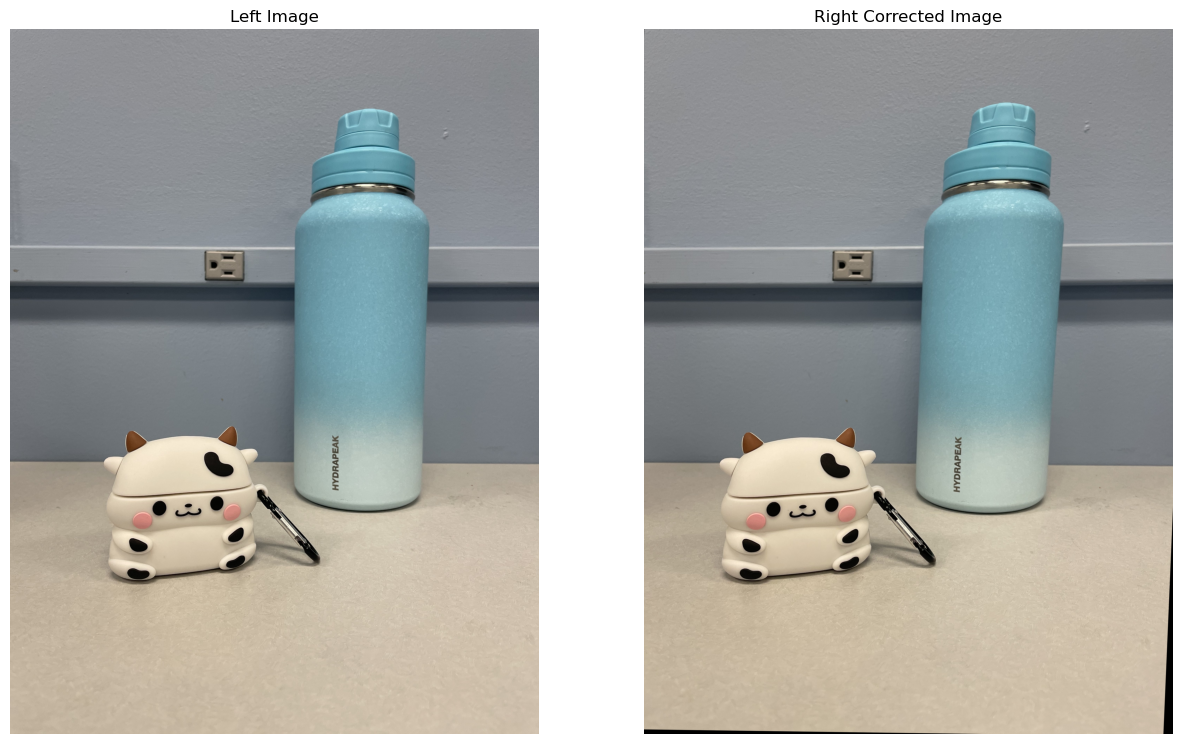

In [15]:
def find_homography(image_one, image_two):
    good_match_percent = 0.50
    max_features = 500  # number of good features that I want to find in an image.
    orb = cv2.ORB_create(500)
    
    # Detect the features and find the descripts of those features.
    keypoints1, descriptors1 = orb.detectAndCompute(image_one, None) # None represents no masks. The other parameter for the detectAndCompute func is a MASK param.
    keypoints2, descriptors2 = orb.detectAndCompute(image_two, None) 

    # Match Features 
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = matcher.match(descriptors1, descriptors2, None)

    # Sort matches by score
    matches = sorted(matches, key =lambda x: x.distance)

    numGoodMatches = int(len(matches) * good_match_percent)
    matches = matches[:numGoodMatches]

    # Draw top matches
    imMatches = cv2.drawMatches(image_one, keypoints1, image_two, keypoints2, matches, None)
    cv2.imwrite("matches.jpg", imMatches)

    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)


    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt
    

    # Find homography
    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

    # Use homography
    height, width, channels = image_one.shape
    im1Reg = cv2.warpPerspective(image_two, h, (width, height)) 

    plot([image_one, im1Reg], ["Left Image", "Right Corrected Image"])
    
    return im1Reg
    
  
registered_image = find_homography(img1_rgb, img2_rgb)

#plot([img1_rgb, registered_image], ["Left Image", "Right Corrected Image"])
#h

In [16]:
img_copy = img1_rgb.copy()
# Setting green and red channels to zero
img_copy[:,:,1] = 0
img_copy[:,:,2] = 0
#setting red channel to zero
registered_image = registered_image.copy()
registered_image[:, :, 0] = 0

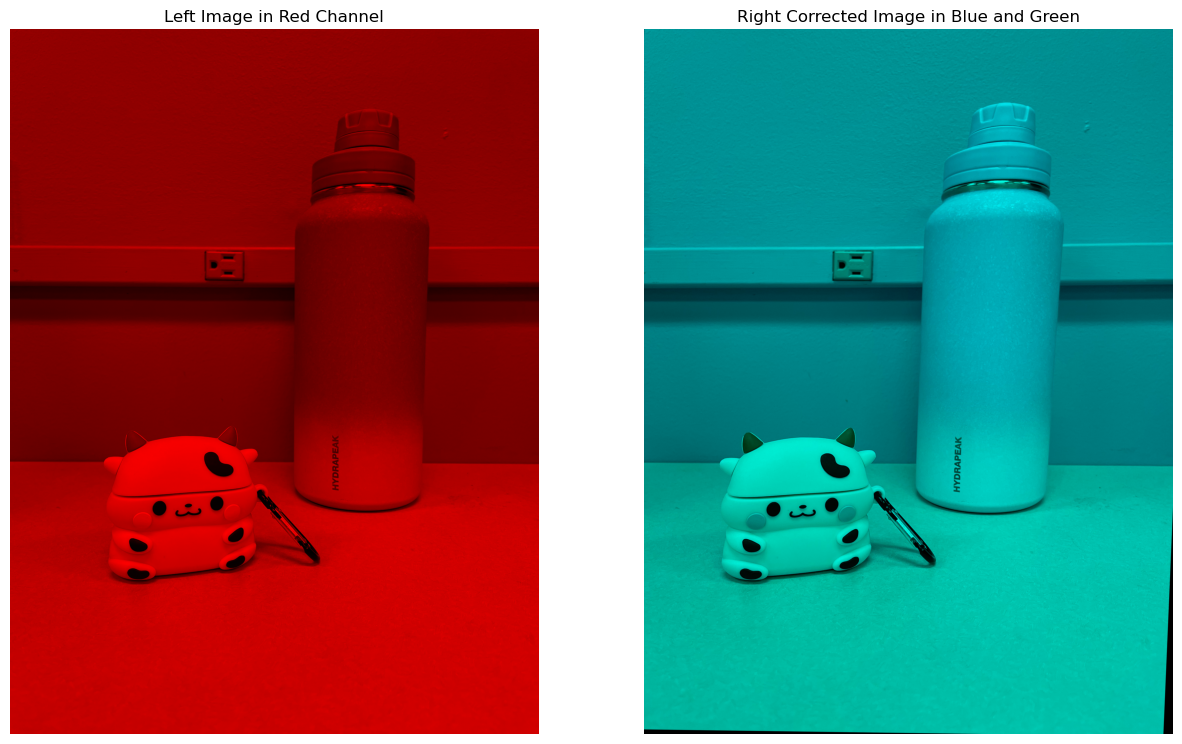

In [17]:
plot([img_copy, registered_image], ["Left Image in Red Channel", "Right Corrected Image in Blue and Green"])

### Anaglyph of translated image.

(-0.5, 3023.5, 4031.5, -0.5)

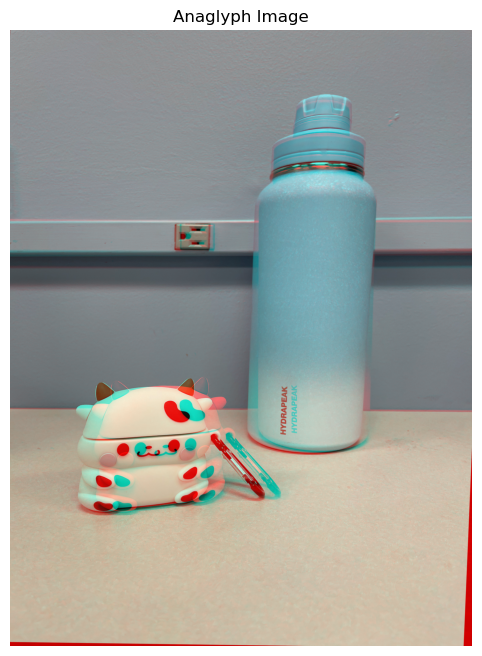

In [18]:
added_images = img_copy + registered_image
plt.figure(figsize=(10,8))
plt.imshow(added_images)
plt.title("Anaglyph Image")
plt.axis('off')

### Rotated and Translated Anaglyph Image.

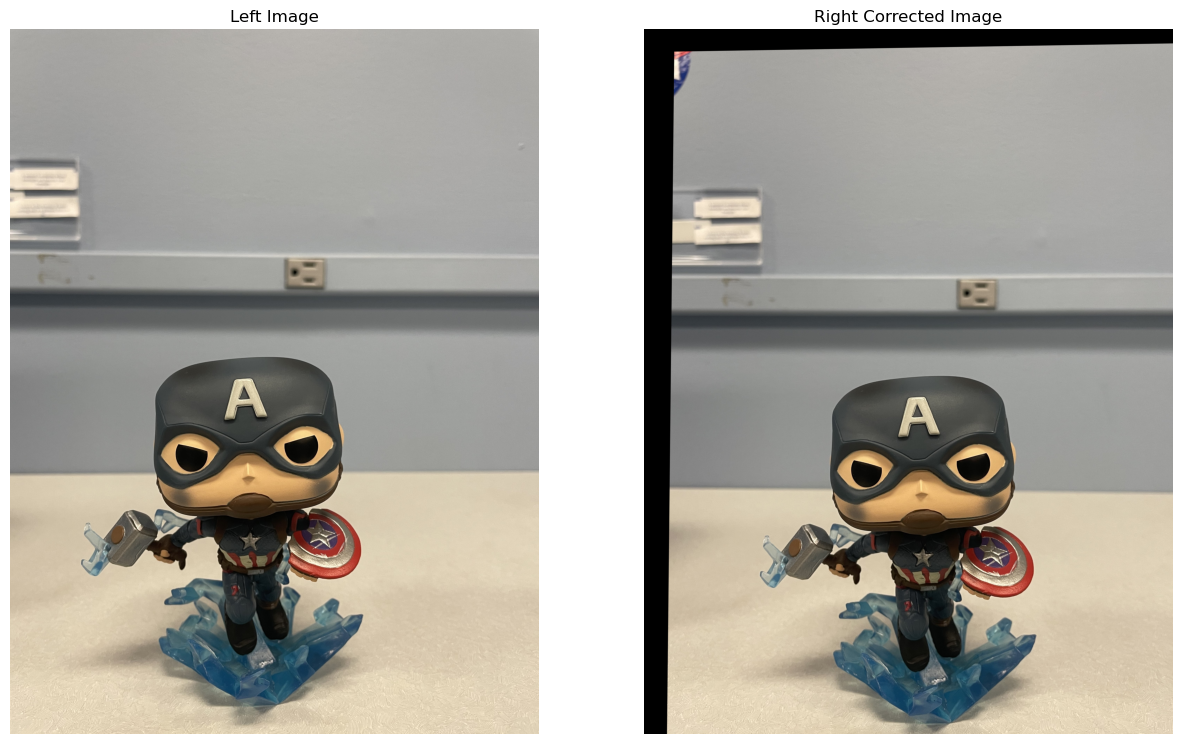

In [19]:
img1_rotation = cv2.imread('HW_04_Images/Pair Two/L1.jpg') # Left image
img2_rotation = cv2.imread('HW_04_Images/Pair Two/R1.jpg') # Right image

#Convert BGR to RGB
img1_rgb_rotation = cv2.cvtColor(img1_rotation, cv2.COLOR_BGR2RGB)
img2_rgb_rotation = cv2.cvtColor(img2_rotation, cv2.COLOR_BGR2RGB)

registered_image_rotation = find_homography(img1_rgb_rotation, img2_rgb_rotation)

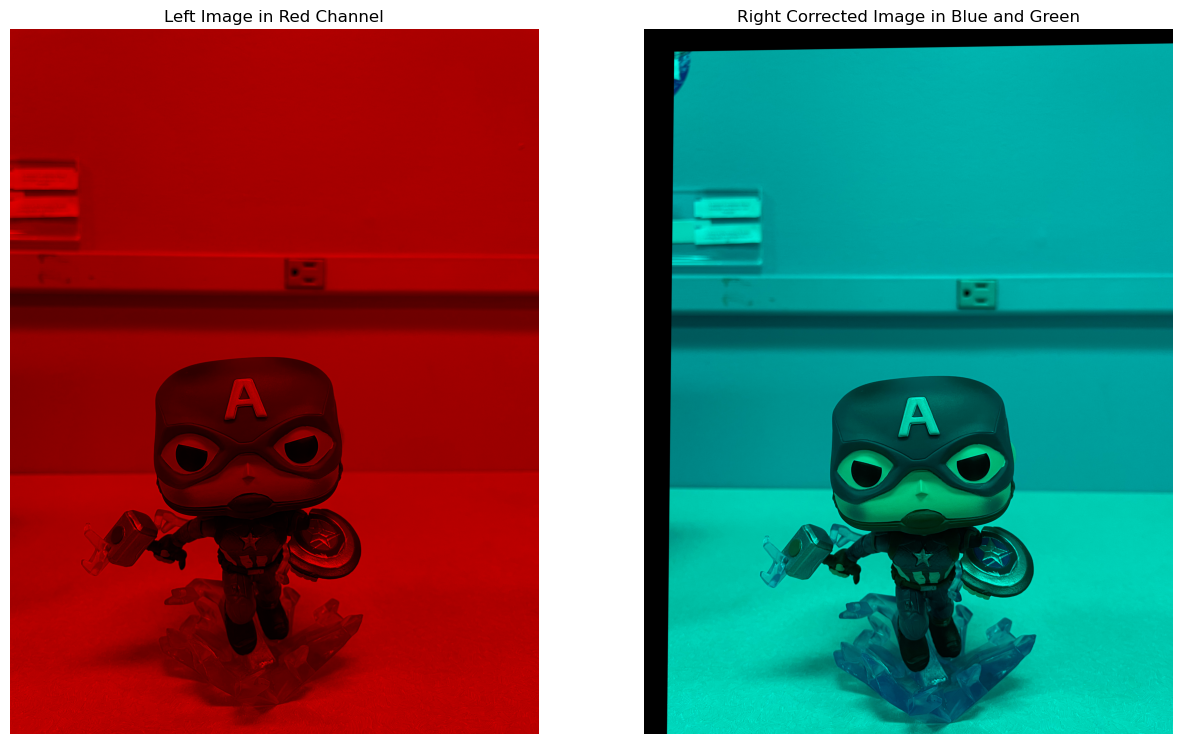

In [20]:
img_copy_rotation = img1_rotation.copy()
   
#Setting green and red channels to zero
img_copy_rotation[:,:,1] = 0
img_copy_rotation[:,:,2] = 0


#setting red channel to zero
registered_image_copy = registered_image_rotation

registered_image_copy[:, :, 0] = 0 

plot([img_copy_rotation, registered_image_copy], ["Left Image in Red Channel", "Right Corrected Image in Blue and Green"])

### Please look at the registered image for the rotated anaglyph for sometime. I rotated my camera slightly as per Derek's comments but the background hasn't been registered. My best result is shown below.

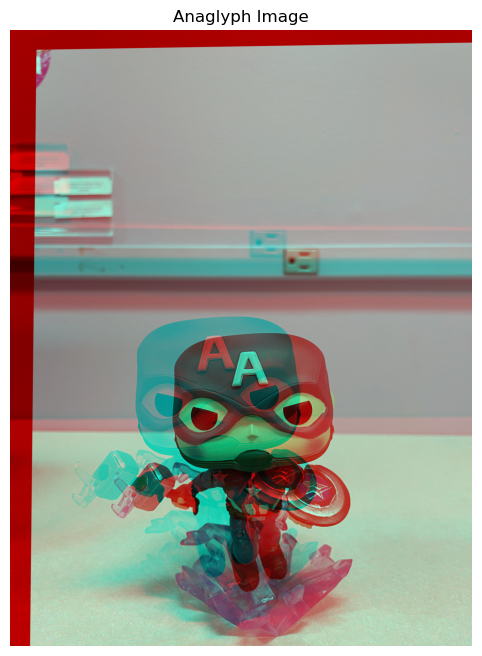

In [23]:
added_images_rotation = img_copy_rotation + registered_image_copy
plt.figure(figsize=(10,8))
plt.imshow(added_images_rotation)
plt.title("Anaglyph Image")
plt.axis('off')
plt.show()